In [255]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Exemple d'utilisation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import r2_score, accuracy_score,f1_score, precision_score,recall_score, classification_report
from sklearn.utils import resample

In [256]:
# https://www.kaggle.com/datasets/damirdizdarevic/uefa-euro-2024-players
foot_df = pd.read_csv("euro2024_players.csv")
foot_df.head()

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany


In [257]:
print(foot_df.shape)
display(foot_df.describe())

(623, 10)


,Age,Height,Caps,Goals,MarketValue
count,623.000000,623.000000,623.000000,623.000000,6.230000e+02
mean,27.040128,184.181380,30.338684,4.152488,1.840903e+07
std,4.124275,6.569258,30.987902,10.086803,2.426195e+07
min,16.000000,167.000000,0.000000,0.000000,5.000000e+04
25%,24.000000,180.000000,7.000000,0.000000,2.900000e+06
50%,27.000000,185.000000,21.000000,1.000000,9.000000e+06
75%,30.000000,189.000000,42.000000,4.000000,2.500000e+07
max,41.000000,202.000000,206.000000,128.000000,1.800000e+08


In [258]:
foot_df.dtypes


Name           object
Position       object
Age             int64
Club           object
Height          int64
Foot           object
Caps            int64
Goals           int64
MarketValue     int64
Country        object
dtype: object

In [259]:
foot_df.isna().sum()

Name           0
Position       0
Age            0
Club           0
Height         0
Foot           3
Caps           0
Goals          0
MarketValue    0
Country        0
dtype: int64

In [260]:
foot_df = foot_df.dropna()

In [261]:
foot_df.duplicated().sum()

0

In [262]:
foot_df

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany
...,...,...,...,...,...,...,...,...,...,...
618,Adam Hlozek,Second Striker,21,Bayer 04 Leverkusen,188,right,31,2,12000000,Czech Republic
619,Patrik Schick,Centre-Forward,28,Bayer 04 Leverkusen,191,left,37,18,22000000,Czech Republic
620,Mojmír Chytil,Centre-Forward,25,SK Slavia Prague,187,-,12,4,6500000,Czech Republic
621,Jan Kuchta,Centre-Forward,27,AC Sparta Prague,185,right,20,3,5000000,Czech Republic


In [263]:
# mapping de la colonne position

position_mapping = {
    'Goalkeeper': 'Gardien de but',
    'Centre-Back': 'Défenseur',
    'Left-Back': 'Défenseur',
    'Right-Back': 'Défenseur',
    'Defensive Midfield': 'Milieu de terrain',
    'Central Midfield': 'Milieu de terrain',
    'Attacking Midfield': 'Milieu de terrain',
    'Left Midfield': 'Milieu de terrain',
    'Right Midfield': 'Milieu de terrain',
    'Left Winger': 'Attaquant',
    'Right Winger': 'Attaquant',
    'Centre-Forward': 'Attaquant',
    'Second Striker': 'Attaquant'
}


In [264]:
# Application du mapping des positions
foot_df['Mapped_Position'] = foot_df['Position'].map(position_mapping)

#Utiliser pd.get_dummies() pour créer les colonnes dummies
dummies_foot = pd.get_dummies(foot_df['Foot'], drop_first=True)


#Concat dummies with general DF : 
foot_df = pd.concat([foot_df, dummies_foot ], axis=1)
foot_df.head(5)

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country,Mapped_Position,both,left,right
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany,Gardien de but,False,False,True
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany,Gardien de but,False,False,True
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany,Gardien de but,False,False,True
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany,Défenseur,False,True,False
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany,Défenseur,False,False,True


In [265]:
foot_df = foot_df.dropna()
foot_df.shape

(620, 14)

In [266]:
# DF to CSV for Tableau vis
foot_df.to_csv('foot.csv', sep=',', index=False)

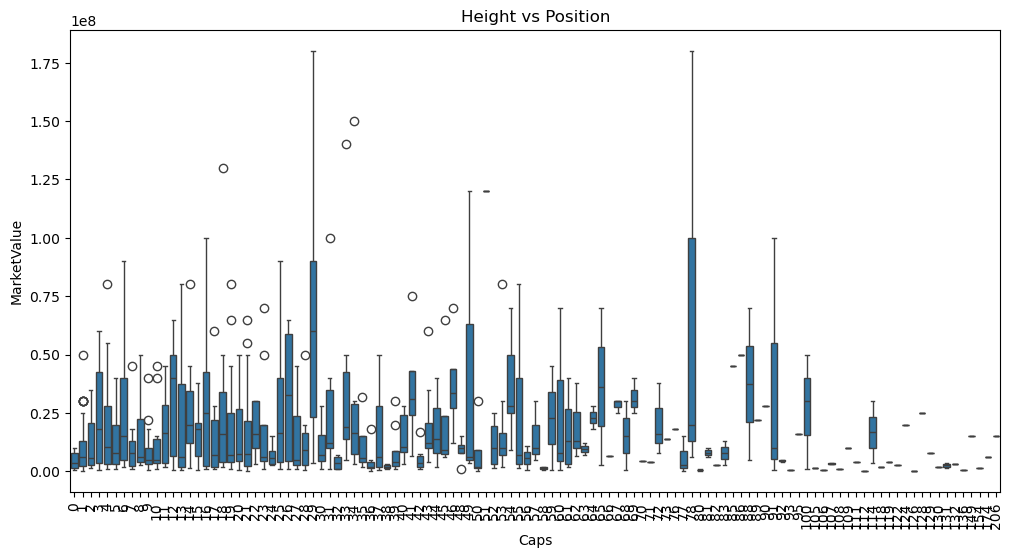

In [267]:
# Analyse bivariée (relation entre les variables et la position)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Caps', y='MarketValue', data=foot_df)
plt.title('Height vs Position')
plt.xticks(rotation=90)
plt.show()

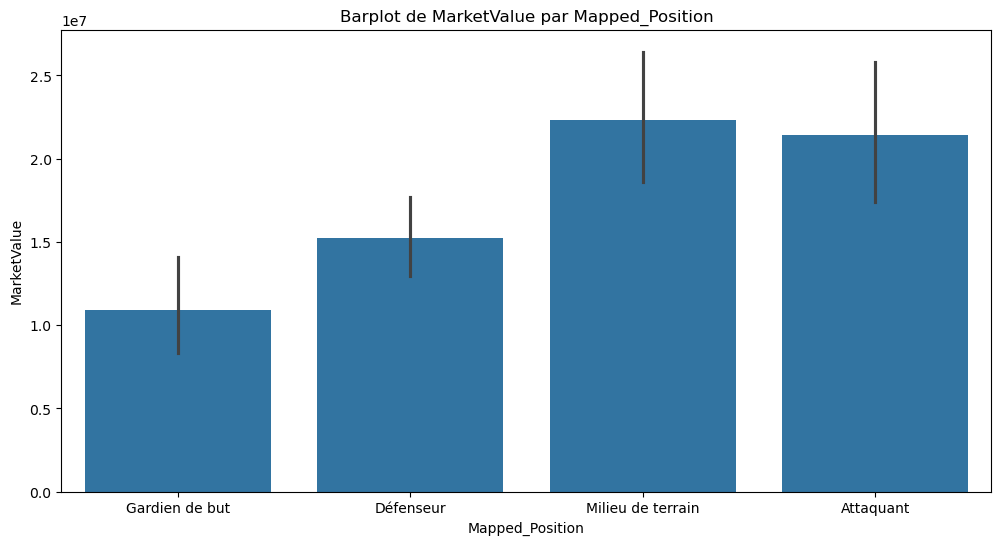

In [268]:

# Barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Mapped_Position', y='MarketValue', data=foot_df)
plt.title('Barplot de MarketValue par Mapped_Position')
plt.show()

In [269]:
num_foot_df = foot_df.select_dtypes(include=['number'])
num_foot_df

,Age,Height,Caps,Goals,MarketValue
0,32,187,40,0,28000000
1,38,193,119,0,4000000
2,34,187,0,0,3000000
3,24,191,12,0,40000000
4,28,195,25,0,30000000
...,...,...,...,...,...
618,21,188,31,2,12000000
619,28,191,37,18,22000000
620,25,187,12,4,6500000
621,27,185,20,3,5000000


<Axes: >

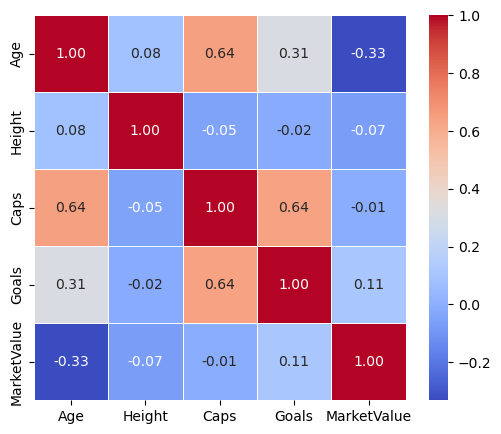

In [270]:
#check correlation between numerical value
corr_matrix = num_foot_df.corr()

plt.figure(figsize=(6, 5))  # Ajuster la taille de la figure pour une meilleure lisibilité
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

C:\Users\User\AppData\Local\Temp\ipykernel_18396\29969957.py:31: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\User\AppData\Local\Temp\ipykernel_18396\29969957.py:31: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\User\AppData\Local\Temp\ipykernel_18396\29969957.py:31: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\User\AppData\Local\Temp\ipykernel_18396\29969957.py:31: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
C:\Users\User\AppData\Local\Temp\ipykernel_18396\29969957.py:31: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


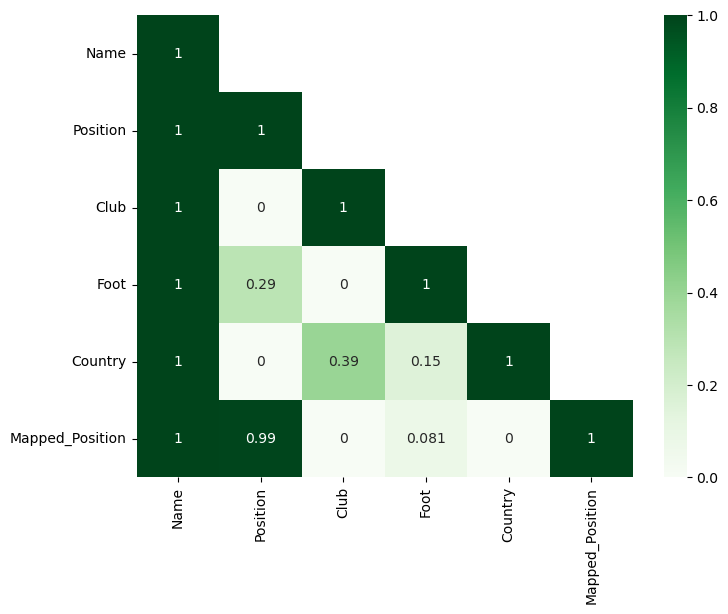

In [271]:
#show correlation between categorical variable
from itertools import combinations
from scipy.stats import chi2_contingency
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

def get_corr_mat(foot_df, f=chi2_contingency):
        columns = foot_df.columns
        dm = pd.DataFrame(index=columns, columns=columns)
        for var1, var2 in combinations(columns, 2):
            cont_table = pd.crosstab(foot_df[var1], foot_df[var2], margins=False)
            chi2_stat = cramers_v(cont_table.values)
            dm.loc[var2, var1] = chi2_stat
            dm.loc[var1, var2] = chi2_stat
        dm.fillna(1, inplace=True)
        return dm

def cramers_v(confusion_matrix):
        """ calculate Cramers V statistic for categorial-categorial association.
            uses correction from Bergsma and Wicher,
            Journal of the Korean Statistical Society 42 (2013): 323-328
        """
        chi2 = ss.chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

df_categorical = foot_df.select_dtypes(include=[object,'category'])

cat_corr= get_corr_mat(df_categorical)
fig, ax = plt.subplots(figsize=(8,6))
le_mask = np.triu(np.ones_like(cat_corr),1)
sns.heatmap(cat_corr, annot = True, cmap='Greens', mask=le_mask)
plt.show()

In [272]:
# Predicting a player's position based on characteristics such as height, foot (right/left), age, goals, and market value.

car = ['Age','Height','Goals','Caps']
features = foot_df[car]
target = foot_df['Mapped_Position']

In [273]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [274]:
#KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10)

In [275]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [276]:
knn.score(X_test, y_test)

0.4032258064516129

In [277]:
 # lets try with scaling the data 
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

In [278]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform (X_test)

In [279]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=10)

In [280]:
knn.score(X_test_scaled,y_test)

0.45161290322580644

In [281]:
#perform all model classifier : 
def evaluate_models(models, X_train, X_test, y_train, y_test):
    """
    Évalue plusieurs modèles de machine learning et renvoie un DataFrame avec les scores.

    Parameters:
    models (dict): Dictionnaire contenant les modèles de machine learning à évaluer.
    X_train (DataFrame): Données d'entraînement.
    X_test (DataFrame): Données de test.
    y_train (Series): Étiquettes d'entraînement.
    y_test (Series): Étiquettes de test.

    Returns:
    DataFrame: DataFrame contenant les scores des modèles.
    """
    results = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            'Model': name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

    results_df = pd.DataFrame(results)
    return results_df


In [282]:
models = {
    'Baggin Classifier': BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=100,
                               max_samples = 100,
                               random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100,
                             max_depth=20,
                             random_state=0),
    'Ada Boost': AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
                            n_estimators=100,
                            random_state=42),
    'Gardient Boosting': GradientBoostingClassifier(max_depth=20,
                                   n_estimators=100,
                                   random_state=42),
    'KNeighbors Classifier' : KNeighborsClassifier(n_neighbors=10)
                    
}

# Assurez-vous d'avoir déjà défini X_train, X_test, y_train, y_test
results_df = evaluate_models(models, X_train, X_test, y_train, y_test)
display(results_df)

,Model,Accuracy,Precision,Recall,F1 Score
0,Baggin Classifier,0.451613,0.482884,0.451613,0.458479
1,Random Forest,0.508065,0.521852,0.508065,0.508726
2,Ada Boost,0.435484,0.466406,0.435484,0.437883
3,Gardient Boosting,0.475806,0.494323,0.475806,0.476537
4,KNeighbors Classifier,0.451613,0.465351,0.451613,0.452937


<Axes: xlabel='Mapped_Position', ylabel='count'>

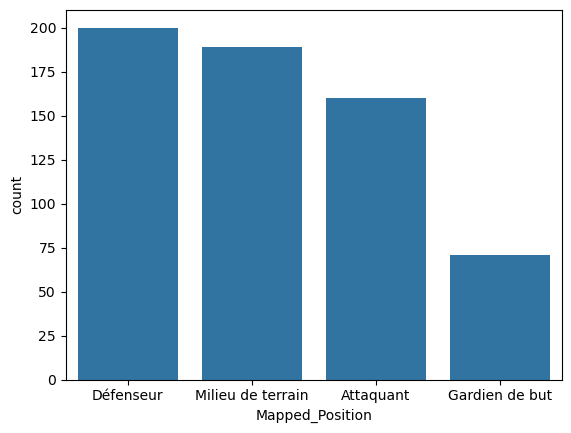

In [283]:
sns.barplot(target.value_counts())

In [284]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [285]:
train["target"] = y_train.values

In [286]:
defenseur = train[train["target"] == 'Défenseur']
milieu = train[train["target"] == 'Milieu de terrain']
attaquant = train[train["target"] == 'Attaquant']
gardien = train[train["target"] == 'Gardien de but']

In [287]:
# 1 fonction par position
milieu_oversampled = resample(milieu, 
                                    replace=True, 
                                    n_samples = len(defenseur), 
                                    random_state=0)
gardien_oversampled = resample(gardien, 
                                    replace=True, 
                                    n_samples = len(defenseur), 
                                    random_state=0)
attaquant_oversampled = resample(attaquant, 
                                    replace=True, 
                                    n_samples = len(defenseur), 
                                    random_state=0)

In [288]:
train_over = pd.concat([milieu_oversampled, defenseur, gardien_oversampled, attaquant_oversampled ])
train_over

,Age,Height,Goals,Caps,target
133,0.60,0.400000,0.054688,0.461165,Milieu de terrain
361,0.72,0.657143,0.000000,0.135922,Milieu de terrain
210,0.44,0.400000,0.015625,0.262136,Milieu de terrain
324,0.52,0.342857,0.171875,0.315534,Milieu de terrain
32,0.12,0.457143,0.000000,0.004854,Milieu de terrain
...,...,...,...,...,...
462,0.28,0.114286,0.007812,0.077670,Attaquant
176,0.28,0.257143,0.070312,0.116505,Attaquant
482,0.36,0.342857,0.054688,0.203883,Attaquant
108,0.40,0.571429,0.085938,0.223301,Attaquant


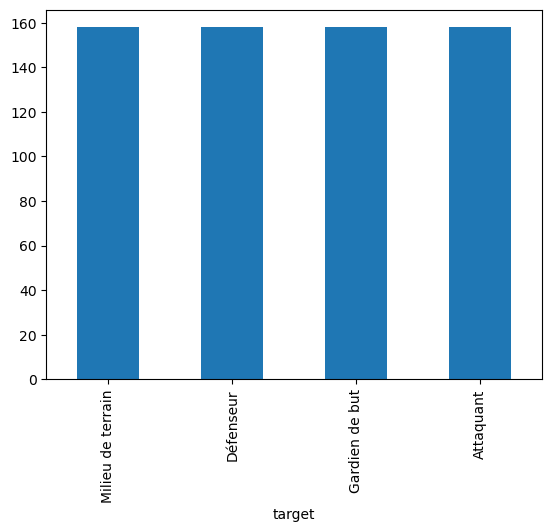

In [289]:
survived_plt = train_over["target"].value_counts()
survived_plt.plot(kind="bar")
plt.show()

In [290]:
X_train_over = train_over.drop(columns = ["target"])
y_train_over = train_over["target"]

In [291]:
log_reg = RandomForestClassifier(n_estimators=100,
                             max_depth=20,
                             random_state=0)
log_reg.fit(X_train_over, y_train_over)

RandomForestClassifier(max_depth=20, random_state=0)

In [292]:
pred2 = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred2, y_true = y_test))


                   precision    recall  f1-score   support

        Attaquant       0.48      0.43      0.46        30
        Défenseur       0.48      0.67      0.56        42
   Gardien de but       0.85      0.65      0.73        17
Milieu de terrain       0.50      0.37      0.43        35

         accuracy                           0.52       124
        macro avg       0.58      0.53      0.54       124
     weighted avg       0.54      0.52      0.52       124



c:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [293]:
print("Accuracy score", accuracy_score(y_test, pred2))
# print("Precision score", precision_score(pred, y_test), average='weighted')
# print("Recall score", recall_score(pred, y_test), average='weighted')
# print("f1 score", f1_score(pred, y_test), average='weighted')

Accuracy score 0.5241935483870968
